# __Interpolacja Kwadratowa__

Wyokrzystując poprzedni notatnik:



## Interpolacja Liniowa

In [34]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.1, 6, 1000)
yln=np.log(x) # Generowanie funkcji logratmicznnej o podstawie e

Zgodnie z treścią przykładu:
- interesuje nas wartość funkcji dla argumentu równego 2 (x_s)
- mamy zdefiniowane 3 punkty:
    - (x0,y0)=(1,log(1))
    - (x1,y1)=(3,log(3))
    - (x2,y2)=(6,log(6))

In [35]:
x_s=2
x0=1
x1=3
x2=6
f0=np.log(x0)
f1=np.log(x1)
f2=np.log(x2)
y_s=np.log(x_s)



Wylicz wartości z pary punktów (x0,y0), (x2,y2) zgodnie z $𝑓_{1}(𝑥)=𝑓(𝑥_{0})+\frac{𝑓(𝑥_{1} )−𝑓(𝑥_{0})}{(𝑥_{1}−𝑥_{0} )} (𝑥−𝑥_{0})$ dla x_s=2

In [36]:
f0+((f2-f0)/(x2-x0))*(x_s-x0)

0.358351893845611

Wylicz wartości z pary punktów (x0,y0), (x1,y1) zgodnie z $𝑓_{1}(𝑥)=𝑓(𝑥_{0})+\frac{𝑓(𝑥_{1} )−𝑓(𝑥_{0})}{(𝑥_{1}−𝑥_{0} )} (𝑥−𝑥_{0})$ dla x_s=2

In [37]:
f0+((f1-f0)/(x1-x0))*(x_s-x0)

0.5493061443340549

## Interpolacja kwadratowa

Wyliczmy współczynniki $b_{0},b_{1},b_{2}$

In [38]:
b0=f0
display(b0)
b1=(f1-f0)/(x1-x0)
display(b1)
b2=((f2-f1)/(x2-x1)-(f1-f0)/(x1-x0))/(x2-x0)
display(b2)

0.0

0.5493061443340549

-0.0636514168294813

Wyliczmy wartość w punkcie x_s:

In [41]:
y2s=b0+b1*(x_s-x0)+b2*(x_s-x0)*(x_s-x1)
display(y2s)

0.6129575611635362

Błąd tym razem wynosi:

In [43]:
abs((np.log(2)-y2s)/np.log(2))*100

11.568916623397287

Narysumy wykres funkcji, z zaznaczeniem wartości prawdziwej dla x_s=2 oraz punktów (x0,y0), (x1,y1), (x2,y2) i wartości wyliczonych z interpolacji liniowej i kwadratowej

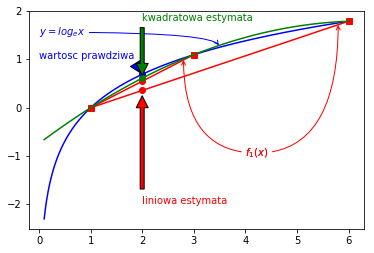

In [44]:
fig, ax = plt.subplots(1)
plt.plot(x, yln, label='linear',color='b')

#narysuj funkcję logarytm
ax.annotate('$y=log_{e}x$', xy=(3.5, np.log(3.5)), xytext=(0, 1.5),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90",color='b'),color='b');
plt.plot(x_s, y_s,'bo')

ax.annotate('wartosc prawdziwa', xy=(x_s, y_s), xytext=(0, 1),
             arrowprops=dict(facecolor='blue', shrink=0.05),color='b');

#zaznacz punkty oraz liniową interpolację
plt.plot([x0,x1,x2], [f0,f1,f2],'rs')
plt.plot([x0,x1], [f0,f1],'r-')
plt.plot([x0,x2], [f0,f2],'r-')
ax.annotate('$f_{1}(x)$', xy=(x1-0.2, np.log(x1-0.2)), xytext=(4, -1),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90",color='r'),color='r');
ax.annotate('$f_{1}(x)$', xy=(x2-0.2, np.log(x2-0.2)), xytext=(4, -1),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90",color='r'),color='r');

# zaznacz wartości wyliczone - linowa
plt.plot(x_s, f0+((f1-f0)/(x1-x0))*(x_s-x0),'ro')
plt.plot(x_s, f0+((f2-f0)/(x2-x0))*(x_s-x0),'ro')
ax.annotate('liniowa estymata', xy=(x_s, f0+((f2-f0)/(x2-x0))*(x_s-x0)), xytext=(x_s, -2),
             arrowprops=dict(facecolor='red', shrink=0.05),color='r');

#narysuj interpolację kwadratową 
plt.plot(x,b0+b1*(x-x0)+b2*(x-x0)*(x-x1), label='linear',color='g')

# zaznacz wartości wyliczone - kwadratowa
plt.plot(x_s, y2s,'go')
ax.annotate('kwadratowa estymata', xy=(x_s, y2s), xytext=(x_s, 1.8),
             arrowprops=dict(facecolor='green', shrink=0.05),color='g');



i powiększenie w interesującym zakresie

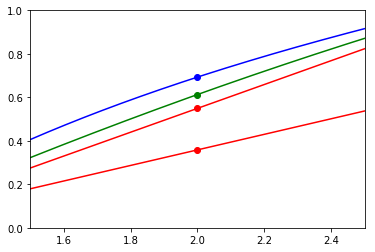

In [45]:
fig, ax = plt.subplots(1)
plt.axes(xlim=(1.5,2.5),ylim=(0,1))
plt.plot(x, yln, label='linear',color='b')

#narysuj funkcję logarytm
ax.annotate('$y=log_{e}x$', xy=(3.5, np.log(3.5)), xytext=(0, 1.5),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90",color='b'),color='b');
plt.plot(x_s, y_s,'bo')

ax.annotate('wartosc prawdziwa', xy=(x_s, y_s), xytext=(0, 1),
             arrowprops=dict(facecolor='blue', shrink=0.05),color='b');

#zaznacz punkty oraz liniową interpolację
plt.plot([x0,x1,x2], [f0,f1,f2],'rs')
plt.plot([x0,x1], [f0,f1],'r-')
plt.plot([x0,x2], [f0,f2],'r-')
ax.annotate('$f_{1}(x)$', xy=(x1-0.2, np.log(x1-0.2)), xytext=(4, -1),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90",color='r'),color='r');
ax.annotate('$f_{1}(x)$', xy=(x2-0.2, np.log(x2-0.2)), xytext=(4, -1),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90",color='r'),color='r');

# zaznacz wartości wyliczone - linowa
plt.plot(x_s, f0+((f1-f0)/(x1-x0))*(x_s-x0),'ro')
plt.plot(x_s, f0+((f2-f0)/(x2-x0))*(x_s-x0),'ro')
ax.annotate('liniowa estymata', xy=(x_s, f0+((f2-f0)/(x2-x0))*(x_s-x0)), xytext=(x_s, -2),
             arrowprops=dict(facecolor='red', shrink=0.05),color='r');

#narysuj interpolację kwadratową 
plt.plot(x,b0+b1*(x-x0)+b2*(x-x0)*(x-x1), label='linear',color='g')

# zaznacz wartości wyliczone - kwadratowa
plt.plot(x_s, y2s,'go')
ax.annotate('kwadratowa estymata', xy=(x_s, y2s), xytext=(x_s, 1.8),
             arrowprops=dict(facecolor='green', shrink=0.05),color='g');


Jak zwykle zapraszam do eksperymentów z kodem.